In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
from google.colab import files
uploaded = files.upload()

Saving food allergy data.csv to food allergy data (1).csv


In [24]:
# Load and preprocess data
df = pd.read_csv('food allergy data.csv')

In [26]:
df.describe()

,Age,FamilyHistory,PreviousReaction,SpecificIgE,Allergy
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,38.117000,0.297000,0.19200,0.006134,0.925000
std,23.093822,0.457165,0.39407,0.998556,0.263523
min,0.000000,0.000000,0.00000,-3.324756,0.000000
25%,18.000000,0.000000,0.00000,-0.679399,1.000000
50%,37.000000,0.000000,0.00000,0.000190,1.000000
75%,59.000000,1.000000,0.00000,0.692666,1.000000
max,79.000000,1.000000,1.00000,3.061947,1.000000


In [27]:
df.head()

,Age,Gender,FamilyHistory,PreviousReaction,SpecificIgE,Allergy
0,51,Female,1,0,1.761689,1
1,14,Male,0,0,-0.282847,1
2,71,Male,1,1,1.289397,1
3,60,Female,0,0,0.968006,1
4,20,Female,1,0,-0.208954,1


In [28]:
df.tail()

,Age,Gender,FamilyHistory,PreviousReaction,SpecificIgE,Allergy
995,39,Female,1,0,-0.363919,1
996,40,Female,0,0,-0.276636,1
997,10,Female,0,0,0.450891,1
998,22,Female,0,0,-0.473865,1
999,0,Male,0,0,-0.365800,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Gender            1000 non-null   object 
 2   FamilyHistory     1000 non-null   int64  
 3   PreviousReaction  1000 non-null   int64  
 4   SpecificIgE       1000 non-null   float64
 5   Allergy           1000 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


<ipython-input-25-95b454ab03f9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')
<ipython-input-25-95b454ab03f9>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Allergy', y='SpecificIgE', palette='Set3')


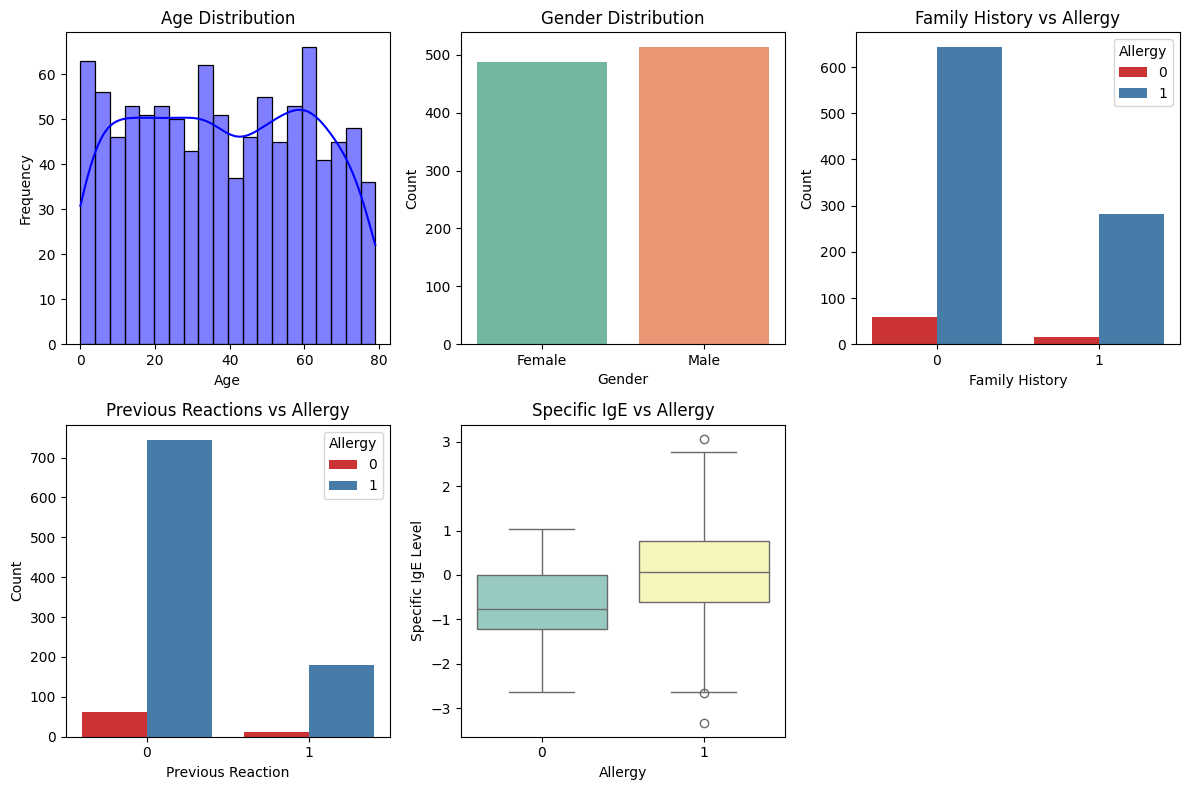

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
# Visualizations
plt.figure(figsize=(12, 8))

# Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Gender Distribution
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Family History and Allergy
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='FamilyHistory', hue='Allergy', palette='Set1')
plt.title('Family History vs Allergy')
plt.xlabel('Family History')
plt.ylabel('Count')

# Previous Reactions and Allergy
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='PreviousReaction', hue='Allergy', palette='Set1')
plt.title('Previous Reactions vs Allergy')
plt.xlabel('Previous Reaction')
plt.ylabel('Count')

# Specific IgE and Allergy
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Allergy', y='SpecificIgE', palette='Set3')
plt.title('Specific IgE vs Allergy')
plt.xlabel('Allergy')
plt.ylabel('Specific IgE Level')

plt.tight_layout()
plt.show()

In [31]:
# Handle categorical feature 'Gender' using one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')  # Create OneHotEncoder object
gender_encoded = ohe.fit_transform(df[['Gender']]).toarray()  # Fit and transform 'Gender' column

# Create a DataFrame from the encoded features
gender_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))

# Drop the original 'Gender' column and concatenate the encoded features
data = df.drop('Gender', axis=1)
data = pd.concat([data, gender_df], axis=1)

# Correct the column name if needed (e.g., if it's 'Allergy')
X = data.drop('Allergy', axis=1).values  # Replace 'Allergy' with the actual column name if different
y = data['Allergy'].values  # Replace 'Allergy' with the actual column name if different

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/50
20/20 [==============================] - 1s 15ms/step - loss: 0.5821 - accuracy: 0.8250 - val_loss: 0.4620 - val_accuracy: 0.9438
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3960 - accuracy: 0.9203 - val_loss: 0.3134 - val_accuracy: 0.9438
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2864 - accuracy: 0.9203 - val_loss: 0.2318 - val_accuracy: 0.9438
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2302 - accuracy: 0.9203 - val_loss: 0.1852 - val_accuracy: 0.9438
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1953 - accuracy: 0.9203 - val_loss: 0.1566 - val_accuracy: 0.9438
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1724 - accuracy: 0.9297 - val_loss: 0.1350 - val_accuracy: 0.9500
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1527 - accuracy: 0.9391 - val_loss: 0.1197 - val_accuracy: 0.9500
Epoch 8/50
20/20 [=

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


7/7 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[ 10   5]
 [  1 184]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.97      0.99      0.98       185

    accuracy                           0.97       200
   macro avg       0.94      0.83      0.88       200
weighted avg       0.97      0.97      0.97       200



7/7 [==============================] - 0s 3ms/step


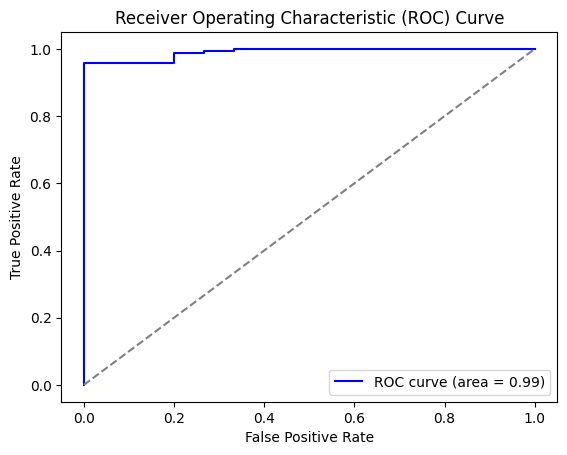

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Hyperparameter Tuning**

GridSearchCV or RandomizedSearchCV: To find the best hyperparameters for your model

In [34]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [35]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

class KerasModelWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, optimizer='adam', batch_size=32, epochs=50):
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None

    def fit(self, X, y):
        self.model = create_model(optimizer=self.optimizer)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def score(self, X, y):
        _, accuracy = self.model.evaluate(X, y, verbose=0)
        return accuracy


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [10, 20, 30],
    'epochs': [50, 100]
}

model = KerasModelWrapper()
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


Best: 0.9887405832608541 using {'batch_size': 30, 'epochs': 100, 'optimizer': 'adam'}


In [40]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [41]:
# Extract the best model from the grid search results
best_model = grid_result.best_estimator_

# Evaluate the model on the test data
loss, accuracy = best_model.model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9800
Accuracy: 98.00%


7/7 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[ 12   3]
 [  1 184]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.98      0.99      0.99       185

    accuracy                           0.98       200
   macro avg       0.95      0.90      0.92       200
weighted avg       0.98      0.98      0.98       200



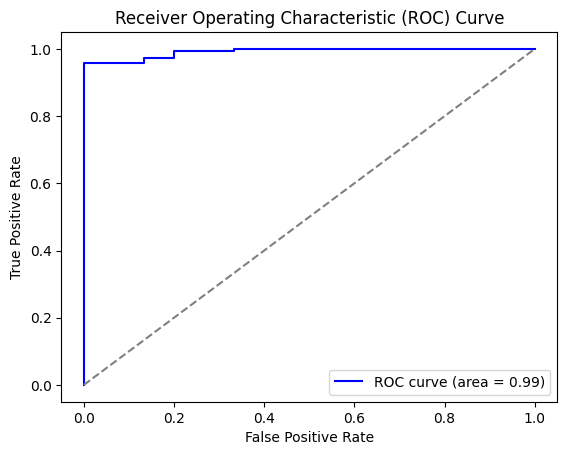

In [42]:
# Predict the labels for the test data
y_pred = best_model.predict(X_test)
y_prob = best_model.model.predict(X_test).ravel()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()